# 데이터 분석의 장벽을 낮추는 판다스 핀셋 강의

이것만 하면 데이터 분석도 어렵지 않다!!!!

## 목차

1. 데이터 살펴보기
    - .unique(), .nunique()
    - .nlargest(), .nsmallest()
    - set().intersection(), set().difference()
    - .duplicated()
    - .sample()
    - indexing
    - slicing


2. 데이터 살펴보기 심화
    - .loc[], .iloc[]
    - .str.contains()
    - .groupby()
    - .stack(), .unstack()


3. 데이터 합치기
    - .merge(), .concat()


4. 데이터 버리고 정리하기
    - .drop()
    - .drop_duplicates()
    - .set_index()
    - .reset_index()
    - .sort_values(), .sort_index(), sorted()
    - .rename()
    


일단 연습용 데이터를 불러와주자

In [3]:
import pandas as pd
import numpy as np
from IPython.display import Image

In [4]:
TRAIN_P_PATH = r'C:\Users\Wyatt\wyatt37/Data/systemError/train_problem_data.csv'
TRAIN_Q_PATH = r'C:\Users\Wyatt\wyatt37/Data/systemError/train_quality_data.csv'
TRAIN_E_PATH = r'C:\Users\Wyatt\wyatt37/Data/systemError/train_err_data.csv'

In [5]:
# 연습용이니 100000만개만 가져옵니다.
train_e = pd.read_csv(TRAIN_E_PATH, nrows=100000)
train_q = pd.read_csv(TRAIN_Q_PATH, nrows=100000)
train_p = pd.read_csv(TRAIN_P_PATH)

C:\Users\Wyatt\anaconda3\envs\wyatt37\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (8,10,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
train_e.shape, train_q.shape, train_p.shape

((100000, 6), (100000, 16), (5429, 2))

In [7]:
train_e.head()

,user_id,time,model_nm,fwver,errtype,errcode
0,10000,20201101025616,model_3,05.15.2138,15,1
1,10000,20201101030309,model_3,05.15.2138,12,1
2,10000,20201101030309,model_3,05.15.2138,11,1
3,10000,20201101050514,model_3,05.15.2138,16,1
4,10000,20201101050515,model_3,05.15.2138,4,0


In [8]:
train_q.head()

,time,user_id,fwver,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
0,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
1,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
2,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
3,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
4,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0


In [9]:
train_p = train_p.sort_values('user_id')[:10].reset_index(drop=True)

## 3. 데이터 합치기

### 3.1 merge()

merge와 concat은 초반에는 아주 헷갈리는 부분이지만 간단하게 접근하면 된다.<br>
merge는 어떤 기준을 가지고 붙이는 것,<br>
concat은 그냥 붙이는 것.

https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

In [12]:
train_p.head()

,user_id,time
0,10001,20201113190000
1,10004,20201104120000
2,10005,20201113120000
3,10006,20201110180000
4,10006,20201110170000


In [13]:
train_e.head()

,user_id,time,model_nm,fwver,errtype,errcode
0,10000,20201101025616,model_3,05.15.2138,15,1
1,10000,20201101030309,model_3,05.15.2138,12,1
2,10000,20201101030309,model_3,05.15.2138,11,1
3,10000,20201101050514,model_3,05.15.2138,16,1
4,10000,20201101050515,model_3,05.15.2138,4,0


자 이렇게 train_p와 train_e가 있다. 우리는 train_e 테이블에 user_id를 기준으로 train_p의 time을 붙이고 싶다. 어떻게 해야 할까? 기준이 있으니 바로 merge를 쓴다.

In [27]:
# pd.merge(
#     left,
#     right,
#     how="inner",
#     on=None,
#     left_on=None,
#     right_on=None,
#     left_index=False,
#     right_index=False,
#     sort=True,
#     suffixes=("_x", "_y")
# )

In [25]:
pd.merge(
            train_e, # 기준이 되는 왼쪽 테이블
            train_p, # 갖다 붙일 오른쪽 테이블
            how='outer', # 갖다 붙이는 방법
            on=['user_id'] # 갖다 붙이는 기준, 기준은 복수도 가능하다.
        )[350:]

,user_id,time_x,model_nm,fwver,errtype,errcode,time_y
350,10001,20201102103018,model_2,04.33.1185,15,1,2.020111e+13
351,10001,20201102103018,model_2,04.33.1185,40,1,2.020111e+13
352,10001,20201102114521,model_2,04.33.1185,16,1,2.020111e+13
353,10001,20201102114522,model_2,04.33.1185,31,1,2.020111e+13
354,10001,20201102114522,model_2,04.33.1185,40,0,2.020111e+13
...,...,...,...,...,...,...,...
100975,10096,20201109084014,model_2,04.33.1185,15,1,NaN
100976,10096,20201109084016,model_2,04.33.1185,16,1,NaN
100977,10096,20201109084016,model_2,04.33.1185,31,1,NaN
100978,10096,20201109084028,model_2,04.33.1185,31,0,NaN


여기서 명심할 부분, merge는 단 두 개를 붙이는 함수다. 그리고 기준이 있어야 한다. join을 쓸 때도 있는데 join은 merge의 하위호환이다. merge를 쓰는 게 낫다고 볼 수 있다.

### 3.2 concat()

concat은 index를 기준으로 간편하게 갖다 붙일 때 쓴다.

In [ ]:
# pd.concat(
#     objs,
#     axis=0,
#     join="outer",
#     ignore_index=False,
#     keys=None,
#     levels=None,
#     names=None,
#     verify_integrity=False,
#     copy=True,
# )

In [39]:
temp = train_e.groupby(['user_id', 'errtype'])['errtype'].count().unstack().fillna(0).loc[:, :'12']
train_e.groupby(['user_id', 'errtype'])['errtype'].count().unstack().fillna(0).loc[:, :'12']

errtype,1,2,3,4,5,6,7,10,11,12
user_id,,,,,,,,,,
10000,0.0,0.0,8.0,104.0,0.0,1.0,1.0,7.0,15.0,16.0
10001,0.0,0.0,0.0,0.0,53.0,1.0,1.0,0.0,10.0,11.0
10002,0.0,0.0,2.0,132.0,1.0,2.0,1.0,1.0,13.0,14.0
10003,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,9.0,9.0
10004,0.0,0.0,0.0,1.0,0.0,3.0,4.0,0.0,16.0,19.0
...,...,...,...,...,...,...,...,...,...,...
10092,26.0,0.0,0.0,252.0,0.0,1.0,1.0,1.0,27.0,27.0
10093,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0
10094,0.0,0.0,0.0,4.0,45.0,4.0,3.0,2.0,20.0,21.0


In [44]:
temp_2 = train_e.groupby(['user_id', 'model_nm'])['model_nm'].count().unstack().fillna(0)
train_e.groupby(['user_id', 'model_nm'])['model_nm'].count().unstack().fillna(0)

model_nm,model_0,model_1,model_2,model_3,model_4,model_7
user_id,,,,,,
10000,0.0,0.0,0.0,317.0,0.0,0.0
10001,0.0,0.0,2365.0,0.0,0.0,0.0
10002,0.0,0.0,0.0,306.0,0.0,0.0
10003,0.0,0.0,306.0,0.0,0.0,0.0
10004,777.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
10092,0.0,0.0,0.0,0.0,1166.0,0.0
10093,0.0,0.0,142.0,0.0,0.0,0.0
10094,0.0,742.0,0.0,0.0,0.0,0.0


위 두 개의 테이블을 합치고 싶다. index가 같으니 concat으로 아주 간단하게 합칠 수 있다.

In [45]:
pd.concat([temp, temp_2], axis=1)

,1,2,3,4,5,6,7,10,11,12,model_0,model_1,model_2,model_3,model_4,model_7
user_id,,,,,,,,,,,,,,,,
10000,0.0,0.0,8.0,104.0,0.0,1.0,1.0,7.0,15.0,16.0,0.0,0.0,0.0,317.0,0.0,0.0
10001,0.0,0.0,0.0,0.0,53.0,1.0,1.0,0.0,10.0,11.0,0.0,0.0,2365.0,0.0,0.0,0.0
10002,0.0,0.0,2.0,132.0,1.0,2.0,1.0,1.0,13.0,14.0,0.0,0.0,0.0,306.0,0.0,0.0
10003,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,9.0,9.0,0.0,0.0,306.0,0.0,0.0,0.0
10004,0.0,0.0,0.0,1.0,0.0,3.0,4.0,0.0,16.0,19.0,777.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10092,26.0,0.0,0.0,252.0,0.0,1.0,1.0,1.0,27.0,27.0,0.0,0.0,0.0,0.0,1166.0,0.0
10093,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,142.0,0.0,0.0,0.0
10094,0.0,0.0,0.0,4.0,45.0,4.0,3.0,2.0,20.0,21.0,0.0,742.0,0.0,0.0,0.0,0.0


concat은 한 번에 여러 개를 합칠 수도 있다.

In [46]:
pd.concat([temp, temp_2, temp_2], axis=1)

,1,2,3,4,5,6,7,10,11,12,...,model_2,model_3,model_4,model_7,model_0,model_1,model_2,model_3,model_4,model_7
user_id,,,,,,,,,,,,,,,,,,,,,
10000,0.0,0.0,8.0,104.0,0.0,1.0,1.0,7.0,15.0,16.0,...,0.0,317.0,0.0,0.0,0.0,0.0,0.0,317.0,0.0,0.0
10001,0.0,0.0,0.0,0.0,53.0,1.0,1.0,0.0,10.0,11.0,...,2365.0,0.0,0.0,0.0,0.0,0.0,2365.0,0.0,0.0,0.0
10002,0.0,0.0,2.0,132.0,1.0,2.0,1.0,1.0,13.0,14.0,...,0.0,306.0,0.0,0.0,0.0,0.0,0.0,306.0,0.0,0.0
10003,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,9.0,9.0,...,306.0,0.0,0.0,0.0,0.0,0.0,306.0,0.0,0.0,0.0
10004,0.0,0.0,0.0,1.0,0.0,3.0,4.0,0.0,16.0,19.0,...,0.0,0.0,0.0,0.0,777.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10092,26.0,0.0,0.0,252.0,0.0,1.0,1.0,1.0,27.0,27.0,...,0.0,0.0,1166.0,0.0,0.0,0.0,0.0,0.0,1166.0,0.0
10093,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,...,142.0,0.0,0.0,0.0,0.0,0.0,142.0,0.0,0.0,0.0
10094,0.0,0.0,0.0,4.0,45.0,4.0,3.0,2.0,20.0,21.0,...,0.0,0.0,0.0,0.0,0.0,742.0,0.0,0.0,0.0,0.0


## 4. 데이터 버리고 정리하기

### 4.1 drop()

드랍은 원하는 row나 column을 버리고 싶을 때 사용한다.

In [52]:
temp_2

model_nm,model_0,model_1,model_2,model_3,model_4,model_7
user_id,,,,,,
10000,0.0,0.0,0.0,317.0,0.0,0.0
10001,0.0,0.0,2365.0,0.0,0.0,0.0
10002,0.0,0.0,0.0,306.0,0.0,0.0
10003,0.0,0.0,306.0,0.0,0.0,0.0
10004,777.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
10092,0.0,0.0,0.0,0.0,1166.0,0.0
10093,0.0,0.0,142.0,0.0,0.0,0.0
10094,0.0,742.0,0.0,0.0,0.0,0.0


위 테이블에서 model_7을 버리고 싶다.

In [53]:
temp_2.drop(['model_7'], axis=1)

model_nm,model_0,model_1,model_2,model_3,model_4
user_id,,,,,
10000,0.0,0.0,0.0,317.0,0.0
10001,0.0,0.0,2365.0,0.0,0.0
10002,0.0,0.0,0.0,306.0,0.0
10003,0.0,0.0,306.0,0.0,0.0
10004,777.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
10092,0.0,0.0,0.0,0.0,1166.0
10093,0.0,0.0,142.0,0.0,0.0
10094,0.0,742.0,0.0,0.0,0.0


10000번 유저를 버리고 싶다.

In [55]:
temp_2.drop([10000], axis=0)

model_nm,model_0,model_1,model_2,model_3,model_4,model_7
user_id,,,,,,
10001,0.0,0.0,2365.0,0.0,0.0,0.0
10002,0.0,0.0,0.0,306.0,0.0,0.0
10003,0.0,0.0,306.0,0.0,0.0,0.0
10004,777.0,0.0,0.0,0.0,0.0,0.0
10005,749.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
10092,0.0,0.0,0.0,0.0,1166.0,0.0
10093,0.0,0.0,142.0,0.0,0.0,0.0
10094,0.0,742.0,0.0,0.0,0.0,0.0


### 4.2 duplicated(), drop_duplicates()

duplicated()는 중복된 값을 boolean으로 반환하는 함수이며, drop_duplicates()는 그런 중복된 값을 버려주는 함수이다.

In [72]:
train_e.duplicated(subset=['user_id', 'time'])

0        False
1        False
2         True
3        False
4        False
         ...  
99995    False
99996    False
99997     True
99998    False
99999    False
Length: 100000, dtype: bool

In [73]:
train_e.loc[train_e.duplicated(subset=['user_id', 'time'])]

,user_id,time,model_nm,fwver,errtype,errcode
2,10000,20201101030309,model_3,05.15.2138,11,1
22,10000,20201103030504,model_3,05.15.2138,11,1
29,10000,20201103140502,model_3,05.15.2138,11,1
30,10000,20201103140502,model_3,05.15.2138,14,1
31,10000,20201103140502,model_3,05.15.2138,12,1
...,...,...,...,...,...,...
99964,10096,20201108050146,model_2,04.33.1185,12,1
99966,10096,20201108050154,model_2,04.33.1185,22,1
99990,10096,20201109015816,model_2,04.33.1185,15,1
99992,10096,20201109080315,model_2,04.33.1185,40,0


drop_duplicates()는 중복된 값을 버릴 때 사용한다.

In [78]:
train_e.drop_duplicates(
                            ['user_id', 'time'], # 기준을 잡아준다.
                            keep='first' # 원하는 행을 하나 살려준다.
                       )

,user_id,time,model_nm,fwver,errtype,errcode
0,10000,20201101025616,model_3,05.15.2138,15,1
1,10000,20201101030309,model_3,05.15.2138,12,1
3,10000,20201101050514,model_3,05.15.2138,16,1
4,10000,20201101050515,model_3,05.15.2138,4,0
5,10000,20201101050516,model_3,05.15.2138,26,1
...,...,...,...,...,...,...
99994,10096,20201109080331,model_2,04.33.1185,31,0
99995,10096,20201109084014,model_2,04.33.1185,15,1
99996,10096,20201109084016,model_2,04.33.1185,16,1
99998,10096,20201109084028,model_2,04.33.1185,31,0


### 4.3 set_index(), reset_index()

set_index()는 column중에 하나를 index로 셋팅하는 것이며, reset_index()는 기존 인덱스를 버리고 새롭게 인덱싱을 하는 것이다.

In [79]:
temp_3 = train_e.drop_duplicates(['user_id', 'time'], keep='first')
temp_3

,user_id,time,model_nm,fwver,errtype,errcode
0,10000,20201101025616,model_3,05.15.2138,15,1
1,10000,20201101030309,model_3,05.15.2138,12,1
3,10000,20201101050514,model_3,05.15.2138,16,1
4,10000,20201101050515,model_3,05.15.2138,4,0
5,10000,20201101050516,model_3,05.15.2138,26,1
...,...,...,...,...,...,...
99994,10096,20201109080331,model_2,04.33.1185,31,0
99995,10096,20201109084014,model_2,04.33.1185,15,1
99996,10096,20201109084016,model_2,04.33.1185,16,1
99998,10096,20201109084028,model_2,04.33.1185,31,0


In [82]:
temp_3.reset_index(drop=True) # drop 여부로 기존 인덱스를 버릴 수 있다.

,user_id,time,model_nm,fwver,errtype,errcode
0,10000,20201101025616,model_3,05.15.2138,15,1
1,10000,20201101030309,model_3,05.15.2138,12,1
2,10000,20201101050514,model_3,05.15.2138,16,1
3,10000,20201101050515,model_3,05.15.2138,4,0
4,10000,20201101050516,model_3,05.15.2138,26,1
...,...,...,...,...,...,...
86350,10096,20201109080331,model_2,04.33.1185,31,0
86351,10096,20201109084014,model_2,04.33.1185,15,1
86352,10096,20201109084016,model_2,04.33.1185,16,1
86353,10096,20201109084028,model_2,04.33.1185,31,0


In [84]:
temp_3.set_index(['user_id'])

,time,model_nm,fwver,errtype,errcode
user_id,,,,,
10000,20201101025616,model_3,05.15.2138,15,1
10000,20201101030309,model_3,05.15.2138,12,1
10000,20201101050514,model_3,05.15.2138,16,1
10000,20201101050515,model_3,05.15.2138,4,0
10000,20201101050516,model_3,05.15.2138,26,1
...,...,...,...,...,...
10096,20201109080331,model_2,04.33.1185,31,0
10096,20201109084014,model_2,04.33.1185,15,1
10096,20201109084016,model_2,04.33.1185,16,1


유저 아이디를 index로 집어넣을 수 있다.

### 4.4 sort_values(), sort_index(), sorted()

때로는 정렬이 필요하 때가 있습니다. 함수 이름에서도 알 수 있듯이, sort_values()는 특정 column을 기준으로 sorting을 해주고, sort_index()는 index를 기준으로 sorting을 해줍니다.

In [85]:
temp_3

,user_id,time,model_nm,fwver,errtype,errcode
0,10000,20201101025616,model_3,05.15.2138,15,1
1,10000,20201101030309,model_3,05.15.2138,12,1
3,10000,20201101050514,model_3,05.15.2138,16,1
4,10000,20201101050515,model_3,05.15.2138,4,0
5,10000,20201101050516,model_3,05.15.2138,26,1
...,...,...,...,...,...,...
99994,10096,20201109080331,model_2,04.33.1185,31,0
99995,10096,20201109084014,model_2,04.33.1185,15,1
99996,10096,20201109084016,model_2,04.33.1185,16,1
99998,10096,20201109084028,model_2,04.33.1185,31,0


In [91]:
temp_3.sort_values(
                    ['model_nm', 'errtype'],
                    ascending=False, # 역정렬도 가능
                    na_position='first' # nan 값이 있다면 위치를 조정
                  )

,user_id,time,model_nm,fwver,errtype,errcode
72439,10075,20201119051313,model_7,05.66.3571,41,NFANDROID2
72461,10075,20201119145726,model_7,05.66.3571,41,NFANDROID2
72467,10075,20201119172741,model_7,05.66.3571,41,NFANDROID2
72466,10075,20201119172515,model_7,05.66.3571,40,1
72468,10075,20201119172838,model_7,05.66.3571,40,0
...,...,...,...,...,...,...
71042,10073,20201112022031,model_0,04.22.1750,4,1
71059,10073,20201112220822,model_0,04.22.1750,4,1
84354,10081,20201101045434,model_0,04.22.1750,4,1
29578,10025,20201104010533,model_0,04.22.1750,2,1


인덱스를 기준으로 정렬을 하려면 sort_index를 쓴다.

In [103]:
temp_3.sort_index(ascending=False)

,user_id,time,model_nm,fwver,errtype,errcode
99999,10096,20201109193407,model_2,04.33.1185,40,1
99998,10096,20201109084028,model_2,04.33.1185,31,0
99996,10096,20201109084016,model_2,04.33.1185,16,1
99995,10096,20201109084014,model_2,04.33.1185,15,1
99994,10096,20201109080331,model_2,04.33.1185,31,0
...,...,...,...,...,...,...
5,10000,20201101050516,model_3,05.15.2138,26,1
4,10000,20201101050515,model_3,05.15.2138,4,0
3,10000,20201101050514,model_3,05.15.2138,16,1
1,10000,20201101030309,model_3,05.15.2138,12,1


sort_index는 간단하게 column을 정렬할 수도 있다. 쓸 일 거의 없다.

In [106]:
temp_3.sort_index(axis=1)

,errcode,errtype,fwver,model_nm,time,user_id
0,1,15,05.15.2138,model_3,20201101025616,10000
1,1,12,05.15.2138,model_3,20201101030309,10000
3,1,16,05.15.2138,model_3,20201101050514,10000
4,0,4,05.15.2138,model_3,20201101050515,10000
5,1,26,05.15.2138,model_3,20201101050516,10000
...,...,...,...,...,...,...
99994,0,31,04.33.1185,model_2,20201109080331,10096
99995,1,15,04.33.1185,model_2,20201109084014,10096
99996,1,16,04.33.1185,model_2,20201109084016,10096
99998,0,31,04.33.1185,model_2,20201109084028,10096


### 4.5 rename()

rename은 테이블의 index나 column 이름을 바꿀 때 사용한다. 여러모로 유용하다.

In [111]:
temp_2.rename({'model_0':'model_999', 'model_1':'model_9999'},
              axis=1)

model_nm,model_999,model_9999,model_2,model_3,model_4,model_7
user_id,,,,,,
10000,0.0,0.0,0.0,317.0,0.0,0.0
10001,0.0,0.0,2365.0,0.0,0.0,0.0
10002,0.0,0.0,0.0,306.0,0.0,0.0
10003,0.0,0.0,306.0,0.0,0.0,0.0
10004,777.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
10092,0.0,0.0,0.0,0.0,1166.0,0.0
10093,0.0,0.0,142.0,0.0,0.0,0.0
10094,0.0,742.0,0.0,0.0,0.0,0.0


In [112]:
temp_2.rename({10000:'aelin', 10001:'ws'},
              axis=0)

model_nm,model_0,model_1,model_2,model_3,model_4,model_7
user_id,,,,,,
aelin,0.0,0.0,0.0,317.0,0.0,0.0
ws,0.0,0.0,2365.0,0.0,0.0,0.0
10002,0.0,0.0,0.0,306.0,0.0,0.0
10003,0.0,0.0,306.0,0.0,0.0,0.0
10004,777.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
10092,0.0,0.0,0.0,0.0,1166.0,0.0
10093,0.0,0.0,142.0,0.0,0.0,0.0
10094,0.0,742.0,0.0,0.0,0.0,0.0


Data Frame이 아닌 Series의 이름을 바꿔야 할 때가 있다. 이때는 df 식으로 rename을 하면 먹지를 않는다. 다른 방법을 쓴다.

In [116]:
train_e.groupby(['user_id'])['user_id'].count()

user_id
10000     317
10001    2365
10002     306
10003     306
10004     777
         ... 
10092    1166
10093     142
10094     742
10095     427
10096     179
Name: user_id, Length: 97, dtype: int64

In [115]:
train_e.groupby(['user_id'])['user_id'].count().rename(level=0, index='temp')

user_id
10000     317
10001    2365
10002     306
10003     306
10004     777
         ... 
10092    1166
10093     142
10094     742
10095     427
10096     179
Name: temp, Length: 97, dtype: int64

## 실습!!!

실습을 통해서 복습을 해보자

### Question_1

길동이는 유저를 기반으로 유저가 사용한 model별로 error 개수를 카운트 한 테이블을 만들고 싶다. 거기에 유저가 사용한 고유의 fwver의 개수를 하나의 컬럼으로 추가하고 싶다. 어떻게 해야할까?

1. user_id를 기준으로 model_nm을 count한 테이블을 만든다.
2. 한 user가 사용한 fwver의 unique 개수를 count 해서 series로 만든다.
3. 1번의 테이블에 2번의 시리즈를 합쳐서 하나의 테이블을 만든다.

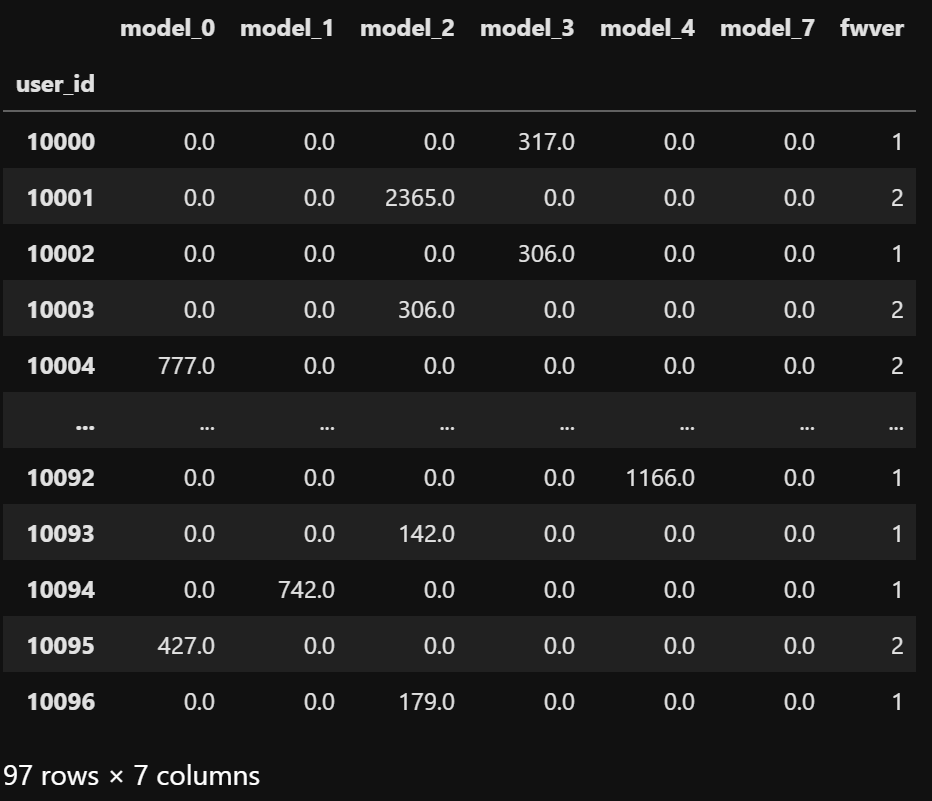

In [129]:
Image(filename= r"C:\Users\Wyatt\Desktop\q1.png",
     width = 500)

### Question_2

길동이는 불편 신고를 한 유저는 몇 번이나 error가 발생했는지 알고 싶다. 그러나 테이블이 전부 찢어져 있어서 바로 보기가 어렵다. 어떻게 볼 수 있을까?

1. train_p 테이블에서 값이 1인 'target' column을 새로 만들어준다.
2. train_q, train_p 테이블의 'user_id' column을 기준으로 합쳐준다.
3. nan값을 0으로 채워준다.
4. user_id를 기반으로 target값을 sum 해준 시리즈를 만든다.

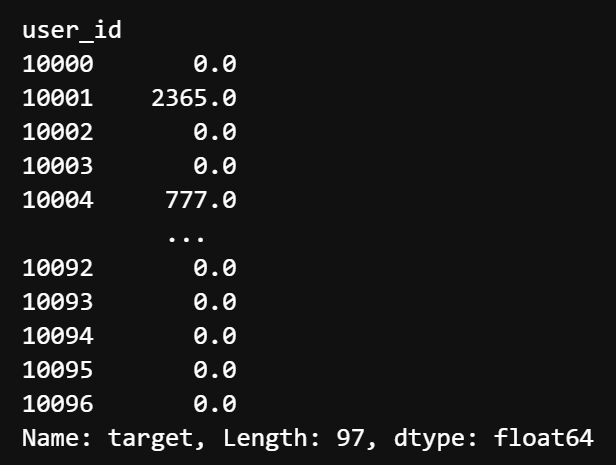

In [154]:
Image(filename= r"C:\Users\Wyatt\Desktop\q2.png",
     width = 300)